# ** CPSC 8810 Deep Learning - HW1-1 **
---

## Introduction

The main objective of this assignments:
* Train 2 distinct DNN models with same amount of parameters until convergence
* Compare the training process of two different models
* Visualize ground truth and predictions from models

In this assignment, two neural networks with same number of parameters but different number of layers are trained to simulate two separate functions. To ensure reproducible results, random seed is fixed for this assignment. The output results of both model are then compared at the final cell of this notebook to determine the effect of number of layers or number of activation functions used.

In [193]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt
tf.__version__

'1.15.0'

### Set the seed to obtain reproducible results

In [194]:
tf.set_random_seed(1)
np.random.seed(1)

## Data preparation and visualization

In the first assignment, two distinct functions are used to compare two models with different number of layers but same number of parameters.
### Function 1 
*f(x) = Sin(5πx)/(5πx)*              
### Function 2
*f(x) = Sigmoid(Sin(5πx))*


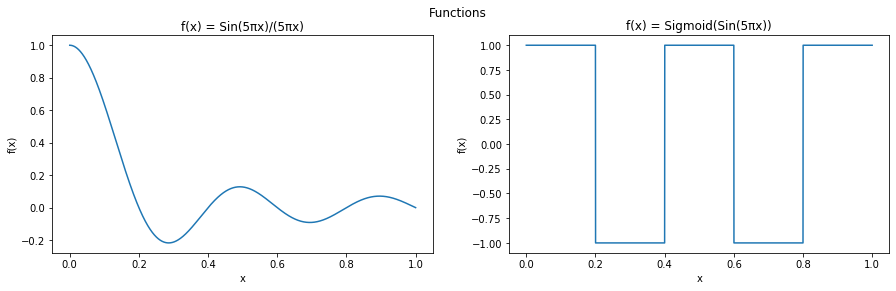

In [195]:
X = np.arange(0.0001,1,0.0001)
X_train = X.reshape(-1,1).astype(np.float32)
Y1 = np.sin(5*np.pi*X)/(5*np.pi*X)
Y1_train = Y1.reshape(-1,1).astype(np.float32)
Y2 = np.sign(np.sin(5*np.pi*X))
Y2_train = Y2.reshape(-1,1).astype(np.float32)
fig,axs = plt.subplots(1,2)
fig.suptitle('Functions')
fig.set_figwidth(15)
axs[0].plot(X,Y1)
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].set_title('f(x) = Sin(5πx)/(5πx)')
axs[1].plot(X,Y2)
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].set_title('f(x) = Sigmoid(Sin(5πx))');

## Placeholder for Input and Output

In [210]:
tf.reset_default_graph()
input_x = tf.placeholder(tf.float32,shape=[None,1])
output_y = tf.placeholder(tf.float32,shape=[None,1])

## 1 - 1st Model

### 1.1 Network Architecture

In [211]:
# Model 1 neural network layers
m1_h1 = tf.layers.dense(inputs=input_x, units=5, activation=tf.nn.relu, name='model1_h1')   # hidden layer
m1_h2 = tf.layers.dense(inputs=m1_h1, units=10, activation=tf.nn.relu, name='model1_h2')        # hidden layer
m1_h3 = tf.layers.dense(inputs=m1_h2, units=15, activation=tf.nn.relu, name='model1_h3')        # hidden layer
m1_h4 = tf.layers.dense(inputs=m1_h3, units=10, activation=tf.nn.relu, name='model1_h4')        # hidden layer
m1_h5 = tf.layers.dense(inputs=m1_h4, units=5, activation=tf.nn.relu, name='model1_h5')        # hidden layer
m1_output = tf.layers.dense(inputs=m1_h4, units=1, name='model1_output')                        # output layer

### 1.2 Parameters Count

In [212]:
total_parameters = 0
for variable in tf.trainable_variables():
    if(variable.name.find("model1")>=0):
        print(variable)
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        print("parameter num:",variable_parameters)
        total_parameters += variable_parameters
print("Total Parameter: ",total_parameters)

<tf.Variable 'model1_h1/kernel:0' shape=(1, 5) dtype=float32_ref>
parameter num: 5
<tf.Variable 'model1_h1/bias:0' shape=(5,) dtype=float32_ref>
parameter num: 5
<tf.Variable 'model1_h2/kernel:0' shape=(5, 10) dtype=float32_ref>
parameter num: 50
<tf.Variable 'model1_h2/bias:0' shape=(10,) dtype=float32_ref>
parameter num: 10
<tf.Variable 'model1_h3/kernel:0' shape=(10, 15) dtype=float32_ref>
parameter num: 150
<tf.Variable 'model1_h3/bias:0' shape=(15,) dtype=float32_ref>
parameter num: 15
<tf.Variable 'model1_h4/kernel:0' shape=(15, 10) dtype=float32_ref>
parameter num: 150
<tf.Variable 'model1_h4/bias:0' shape=(10,) dtype=float32_ref>
parameter num: 10
<tf.Variable 'model1_h5/kernel:0' shape=(10, 5) dtype=float32_ref>
parameter num: 50
<tf.Variable 'model1_h5/bias:0' shape=(5,) dtype=float32_ref>
parameter num: 5
<tf.Variable 'model1_output/kernel:0' shape=(10, 1) dtype=float32_ref>
parameter num: 10
<tf.Variable 'model1_output/bias:0' shape=(1,) dtype=float32_ref>
parameter num: 1


### 1.3 Loss function and Optimizer Initialization

In [213]:
m1_loss = tf.losses.mean_squared_error(output_y, m1_output)   # compute cost
m1_optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
m1_train_op = m1_optimizer.minimize(m1_loss)

### 1.4 Training model on Function 1

In [214]:
sess = tf.Session() 
sess.run(tf.global_variables_initializer())         # initialize var in graph
EPOCH = 10000

m1_loss_list1 = []
for i in range(EPOCH):
    # train and net output
    _, l, pred = sess.run([m1_train_op, m1_loss, m1_output], feed_dict={input_x: X_train, output_y: Y1_train})
    m1_loss_list1.append(l)
    if i%2000 == 0:
        print("Epoch: ",i,"Loss: ",l)
m1_pred1 = pred

Epoch:  0 Loss:  0.09787916
Epoch:  2000 Loss:  0.009265913
Epoch:  4000 Loss:  0.004583871
Epoch:  6000 Loss:  0.001940441
Epoch:  8000 Loss:  0.00041284302


### 1.5 Training model on Function 2

In [215]:
sess = tf.Session() 
sess.run(tf.global_variables_initializer())         # initialize var in graph
EPOCH = 10000
m1_loss_list2 = []
for i in range(EPOCH):
    # train and net output
    _, l, pred = sess.run([m1_train_op, m1_loss, m1_output], feed_dict={input_x: X_train, output_y: Y2_train})
    m1_loss_list2.append(l)
    if i%2000 == 0:
        print("Epoch: ",i,"Loss: ",l)
m1_pred2 = pred

Epoch:  0 Loss:  0.9891212
Epoch:  2000 Loss:  0.6866875
Epoch:  4000 Loss:  0.55528563
Epoch:  6000 Loss:  0.22418861
Epoch:  8000 Loss:  0.09766583


### 1.6 Result Visualization

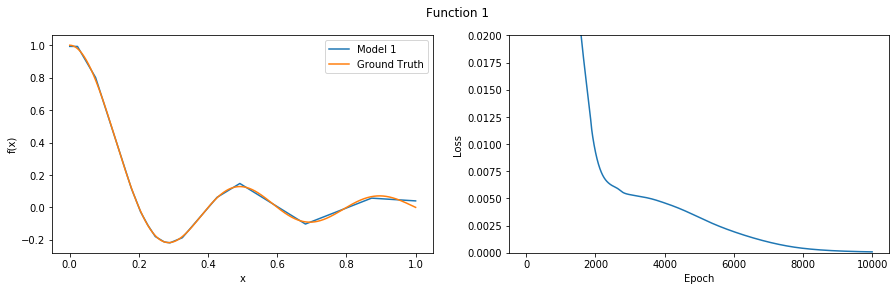

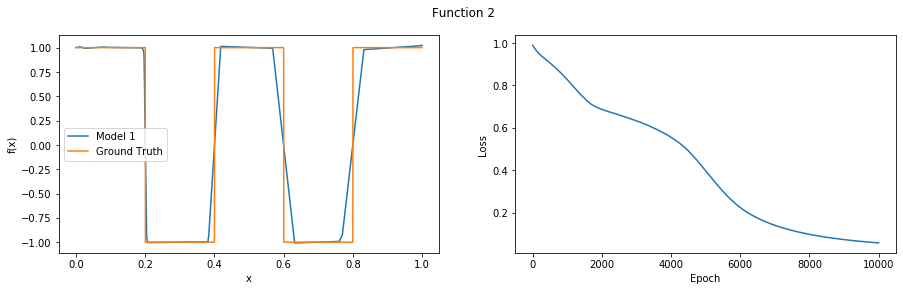

In [216]:
# Function 1
fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
axs[0].plot(X,m1_pred1,X,Y1)
fig.suptitle('Function 1')
axs[0].legend(('Model 1','Ground Truth'))
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

epoch_list = np.arange(EPOCH)
axs[1].plot(epoch_list,m1_loss_list1)
axs[1].set_ylim([0,0.02])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss');

plt.pause(0.1)

# Function 2
fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
axs[0].plot(X,m1_pred2,X,Y2)
fig.suptitle('Function 2')
axs[0].legend(('Model 1','Ground Truth'))
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

axs[1].plot(epoch_list,m1_loss_list2)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss');

---
## 2 - 2nd Model

### 2.1 Network Architecture

In [217]:
tf.reset_default_graph()
input_x = tf.placeholder(tf.float32,shape=[None,1])
output_y = tf.placeholder(tf.float32,shape=[None,1])
# Model 2 neural network layers
m2_h1 = tf.layers.dense(inputs=input_x, units=6, activation=tf.nn.relu, name='model2_h1')   # hidden layer
m2_h2 = tf.layers.dense(inputs=m2_h1, units=18, activation=tf.nn.relu, name='model2_h2')        # hidden layer
m2_h3 = tf.layers.dense(inputs=m2_h2, units=16, activation=tf.nn.relu, name='model2_h4')        # hidden layer
m2_output = tf.layers.dense(inputs=m2_h3, units=1, name='model2_output')                        # output layer

### 2.2 Parameters Count

In [218]:
total_parameters = 0
for variable in tf.trainable_variables():
    if(variable.name.find("model2")>=0):
        print(variable)
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        print("parameter num:",variable_parameters)
        total_parameters += variable_parameters
print("Total Parameter: ",total_parameters)

<tf.Variable 'model2_h1/kernel:0' shape=(1, 6) dtype=float32_ref>
parameter num: 6
<tf.Variable 'model2_h1/bias:0' shape=(6,) dtype=float32_ref>
parameter num: 6
<tf.Variable 'model2_h2/kernel:0' shape=(6, 18) dtype=float32_ref>
parameter num: 108
<tf.Variable 'model2_h2/bias:0' shape=(18,) dtype=float32_ref>
parameter num: 18
<tf.Variable 'model2_h4/kernel:0' shape=(18, 16) dtype=float32_ref>
parameter num: 288
<tf.Variable 'model2_h4/bias:0' shape=(16,) dtype=float32_ref>
parameter num: 16
<tf.Variable 'model2_output/kernel:0' shape=(16, 1) dtype=float32_ref>
parameter num: 16
<tf.Variable 'model2_output/bias:0' shape=(1,) dtype=float32_ref>
parameter num: 1
Total Parameter:  459


### 2.3 Loss Function and Optimizer Initialization

In [219]:
m2_loss = tf.losses.mean_squared_error(output_y, m2_output)   # compute cost
m2_optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
m2_train_op = m2_optimizer.minimize(m2_loss)

### 2.4 Training Model on Function 1

In [220]:
sess = tf.Session() 
sess.run(tf.global_variables_initializer())         # initialize var in graph
EPOCH = 10000
m2_loss_list1 = []
for i in range(EPOCH):
    # train and net output
    _, l, pred = sess.run([m2_train_op, m2_loss, m2_output], feed_dict={input_x: X_train, output_y: Y1_train})
    m2_loss_list1.append(l)
    if i%2000 == 0:
        print("Epoch: ",i,"Loss: ",l)
m2_pred1 = pred

Epoch:  0 Loss:  0.098597236
Epoch:  2000 Loss:  0.036449075
Epoch:  4000 Loss:  0.005800408
Epoch:  6000 Loss:  0.005684397
Epoch:  8000 Loss:  0.0056804456


### 2.5 Training Model on Function 2

In [221]:
sess = tf.Session() 
sess.run(tf.global_variables_initializer())         # initialize var in graph
EPOCH = 10000
m2_loss_list2 = []
for i in range(EPOCH):
    # train and net output
    _, l, pred = sess.run([m2_train_op, m2_loss, m2_output], feed_dict={input_x: X_train, output_y: Y2_train})
    m2_loss_list2.append(l)
    if i%2000 == 0:
        print("Epoch: ",i,"Loss: ",l)
m2_pred2 = pred

Epoch:  0 Loss:  0.9743858
Epoch:  2000 Loss:  0.74088866
Epoch:  4000 Loss:  0.6146885
Epoch:  6000 Loss:  0.6014373
Epoch:  8000 Loss:  0.59678864


### 2.6 Result Visualization

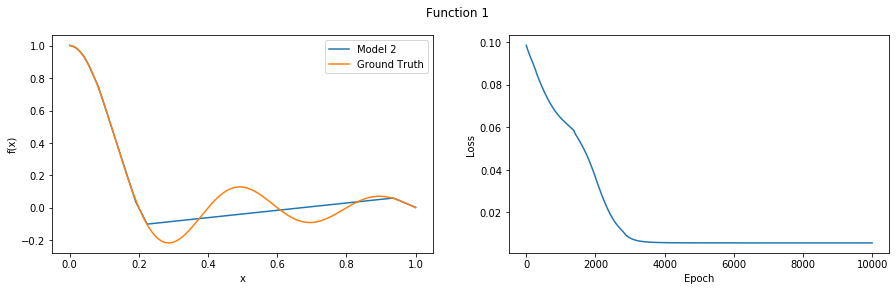

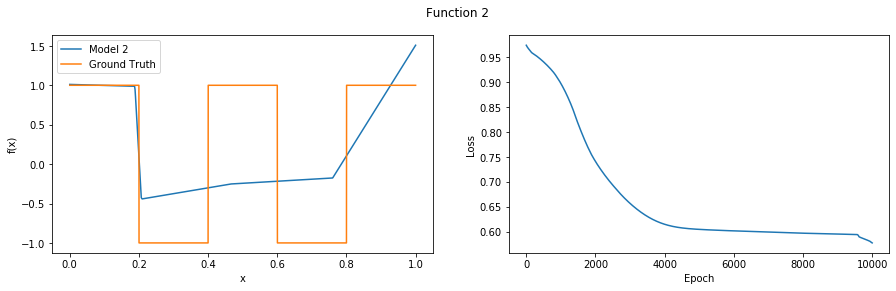

In [222]:
# Function 1
fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
axs[0].plot(X,m2_pred1,X,Y1)
fig.suptitle('Function 1')
axs[0].legend(('Model 2','Ground Truth'))
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

epoch_list = np.arange(EPOCH)
axs[1].plot(epoch_list,m2_loss_list1)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss');

plt.pause(0.1)

fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
axs[0].plot(X,m2_pred2,X,Y2)
fig.suptitle('Function 2')
axs[0].legend(('Model 2','Ground Truth'))
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[1].plot(epoch_list,m2_loss_list2)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss');

## Final Result Comparison

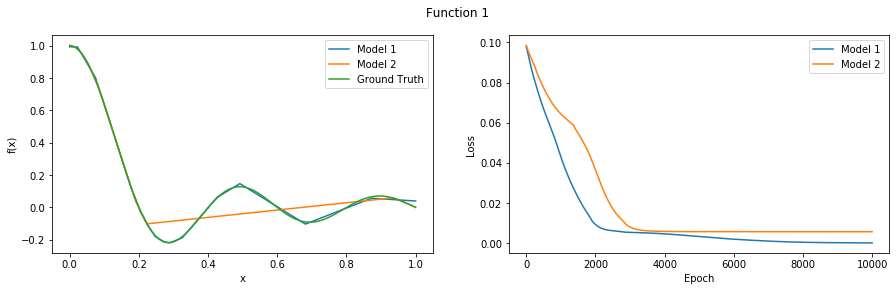

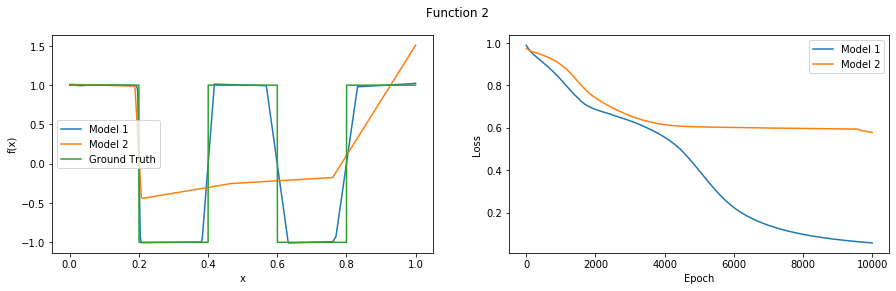

In [223]:
# Function 1
fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
axs[0].plot(X,m1_pred1,X,m2_pred1,X,Y1)
fig.suptitle('Function 1')
axs[0].legend(('Model 1','Model 2','Ground Truth'))
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

epoch_list = np.arange(EPOCH)
axs[1].plot(epoch_list,m1_loss_list1,epoch_list,m2_loss_list1)
axs[1].legend(('Model 1','Model 2'))
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss');
plt.pause(0.1)

# Function 2
fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
axs[0].plot(X,m1_pred2,X,m2_pred2,X,Y2)
fig.suptitle('Function 2')
axs[0].legend(('Model 1','Model 2','Ground Truth'))
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')

axs[1].plot(epoch_list,m1_loss_list2,epoch_list,m2_loss_list2)
axs[1].legend(('Model 1','Model 2'))
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss');